In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data_location = 'C:/Users/kaley/OneDrive/Documents/Coding Stuff/Data Science/Mental Health Project/Sample Data/'
mood_data_location = data_location+'FinchExport_2025-03-01/Mood.json'
tag_data_location = data_location+'FinchExport_2025-03-01/Tag.json'

In [3]:
mood_series = pd.read_json(mood_data_location, typ='series')
mood_data = pd.json_normalize(mood_series.data)

In [4]:
mood_data.head()

,dt,mood_type,value,updated_time
0,"Sat, 6 May 2023 14:00:58",feeling,4,"Sat, 6 May 2023 14:00:58"
1,"Sun, 11 Feb 2024 04:06:37",satisfaction,4,"Sun, 11 Feb 2024 04:06:37"
2,"Wed, 2 Nov 2022 09:04:11",motivation,3,"Wed, 2 Nov 2022 09:04:11"
3,"Wed, 12 Jul 2023 19:02:37",feeling,3,"Wed, 12 Jul 2023 19:02:37"
4,"Sat, 1 Mar 2025 13:39:47",motivation,2,"Sat, 1 Mar 2025 13:39:47"


In [5]:
mood_data.shape

(3882, 4)

In [6]:
mood_data['value'] = pd.to_numeric(mood_data.value)

In [7]:
mood_data.dtypes

dt              object
mood_type       object
value            int64
updated_time    object
dtype: object

In [8]:
mood_data.groupby(by=['mood_type']).count()

,dt,value,updated_time
mood_type,,,
feeling,2376,2376,2376
motivation,827,827,827
satisfaction,679,679,679


In [9]:
# these are the three categories of Mood available from my Finch data
# from my understanding, based on using the Finch app, the categories are:
#  * feeling : 1 to 5, "sad" face to "happy" face, how I felt in that moment
#  * motivation : 1 to 5, how motivated I feel for the day ahead, asked when I first open the app that day
#  * satisfaction : 1 to 5, how satisfied I felt with the day, asked at the end of the day

### feeling data

In [10]:
feeling_df = mood_data[mood_data['mood_type'] == 'feeling']

In [11]:
feeling_df = feeling_df[['dt', 'value']]

In [12]:
feeling_df.head()

,dt,value
0,"Sat, 6 May 2023 14:00:58",4
3,"Wed, 12 Jul 2023 19:02:37",3
6,"Tue, 10 Dec 2024 16:48:10",4
8,"Sun, 29 Oct 2023 20:50:48",3
10,"Thu, 27 Oct 2022 00:48:53",3


In [13]:
feeling_df['Datetime'] = pd.to_datetime(feeling_df.dt)
feeling_df['Date'] = feeling_df['Datetime'].dt.date

#just looking, this doesn't save the sort
feeling_df.sort_values('dt',ascending=False).head()

,dt,value,Datetime,Date
2828,"Wed, 9 Oct 2024 20:15:41",3,2024-10-09 20:15:41,2024-10-09
2901,"Wed, 9 Oct 2024 15:36:19",3,2024-10-09 15:36:19,2024-10-09
3752,"Wed, 9 Oct 2024 13:58:52",4,2024-10-09 13:58:52,2024-10-09
2871,"Wed, 9 Nov 2022 21:36:39",3,2022-11-09 21:36:39,2022-11-09
1378,"Wed, 9 Nov 2022 20:02:11",4,2022-11-09 20:02:11,2022-11-09


In [14]:
# looking at the spread of how often I feel each feeling
feeling_df.groupby("value").count()

,dt,Datetime,Date
value,,,
1,33,33,33
2,100,100,100
3,640,640,640
4,1515,1515,1515
5,88,88,88


### looking at motivation

In [15]:
motivation_df = mood_data[mood_data['mood_type'] == 'motivation']
motivation_df.head()

,dt,mood_type,value,updated_time
2,"Wed, 2 Nov 2022 09:04:11",motivation,3,"Wed, 2 Nov 2022 09:04:11"
4,"Sat, 1 Mar 2025 13:39:47",motivation,2,"Sat, 1 Mar 2025 13:39:47"
5,"Sat, 27 Jul 2024 08:44:06",motivation,3,"Sat, 27 Jul 2024 08:44:06"
9,"Wed, 12 Jun 2024 08:44:28",motivation,3,"Wed, 12 Jun 2024 08:44:28"
25,"Mon, 9 Sep 2024 09:07:02",motivation,4,"Mon, 9 Sep 2024 09:07:02"


In [16]:
motivation_df['Datetime'] = pd.to_datetime(motivation_df.dt)
motivation_df['Date'] = motivation_df['Datetime'].dt.date

#just looking, this doesn't save the sort
motivation_df.sort_values('dt',ascending=False).head()

C:\Users\kaley\AppData\Local\Temp\ipykernel_16220\3792793037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motivation_df['Datetime'] = pd.to_datetime(motivation_df.dt)
C:\Users\kaley\AppData\Local\Temp\ipykernel_16220\3792793037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motivation_df['Date'] = motivation_df['Datetime'].dt.date


,dt,mood_type,value,updated_time,Datetime,Date
3253,"Wed, 9 Oct 2024 11:06:57",motivation,3,"Wed, 9 Oct 2024 11:06:57",2024-10-09 11:06:57,2024-10-09
3158,"Wed, 9 Nov 2022 08:23:41",motivation,4,"Wed, 9 Nov 2022 08:23:41",2022-11-09 08:23:41,2022-11-09
2150,"Wed, 9 Aug 2023 14:13:00",motivation,2,"Wed, 9 Aug 2023 14:13:00",2023-08-09 14:13:00,2023-08-09
2680,"Wed, 8 Nov 2023 11:16:40",motivation,4,"Wed, 8 Nov 2023 11:16:40",2023-11-08 11:16:40,2023-11-08
496,"Wed, 8 May 2024 12:39:39",motivation,1,"Wed, 8 May 2024 12:39:39",2024-05-08 12:39:39,2024-05-08


In [17]:
motivation_df.groupby('value').count()

,dt,mood_type,updated_time,Datetime,Date
value,,,,,
1,6,6,6,6,6
2,50,50,50,50,50
3,341,341,341,341,341
4,389,389,389,389,389
5,41,41,41,41,41


### satisfaction_data

In [18]:
satisfaction_df = mood_data[mood_data['mood_type'] == 'satisfaction']

In [19]:
satisfaction_df.head()

,dt,mood_type,value,updated_time
1,"Sun, 11 Feb 2024 04:06:37",satisfaction,4,"Sun, 11 Feb 2024 04:06:37"
7,"Wed, 2 Nov 2022 22:06:19",satisfaction,1,"Wed, 2 Nov 2022 22:06:19"
11,"Sun, 3 Nov 2024 01:17:46",satisfaction,3,"Sun, 3 Nov 2024 01:17:46"
14,"Wed, 14 Dec 2022 03:26:55",satisfaction,4,"Wed, 14 Dec 2022 03:26:55"
16,"Sat, 20 May 2023 00:25:57",satisfaction,4,"Sat, 20 May 2023 00:25:57"


In [20]:
satisfaction_df['Datetime'] = pd.to_datetime(satisfaction_df.dt)
satisfaction_df['Date'] = satisfaction_df['Datetime'].dt.date

#just looking, this doesn't save the sort
satisfaction_df.sort_values('dt',ascending=False).head()

C:\Users\kaley\AppData\Local\Temp\ipykernel_16220\329134803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_df['Datetime'] = pd.to_datetime(satisfaction_df.dt)
C:\Users\kaley\AppData\Local\Temp\ipykernel_16220\329134803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_df['Date'] = satisfaction_df['Datetime'].dt.date


,dt,mood_type,value,updated_time,Datetime,Date
3443,"Wed, 9 Nov 2022 23:56:16",satisfaction,4,"Wed, 9 Nov 2022 23:56:16",2022-11-09 23:56:16,2022-11-09
2773,"Wed, 9 Aug 2023 23:50:54",satisfaction,4,"Wed, 9 Aug 2023 23:50:54",2023-08-09 23:50:54,2023-08-09
2311,"Wed, 8 Nov 2023 04:48:27",satisfaction,3,"Wed, 8 Nov 2023 04:48:27",2023-11-08 04:48:27,2023-11-08
1481,"Wed, 8 May 2024 04:30:12",satisfaction,3,"Wed, 8 May 2024 04:30:12",2024-05-08 04:30:12,2024-05-08
1543,"Wed, 8 Mar 2023 22:28:22",satisfaction,3,"Wed, 8 Mar 2023 22:28:22",2023-03-08 22:28:22,2023-03-08


In [21]:
# feeling_df as function of time?

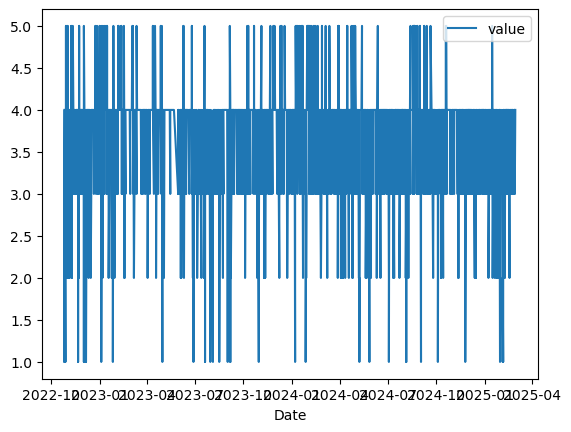

In [22]:
feeling_df.plot(x='Date', y='value');

In [23]:
# the graph isn't super meaningful of course, as moods flucuate too rapidly
# modeling the data and looking for trends and relationships between factors should be better

### Logistic Regression

In [24]:
# feelings (1=bad ... 5=great) as response variable, "effect" ?
# Ordinal Logistic Regression

In [25]:
completed_variables_df = pd.read_csv('completed_variables.csv')
completed_variables_df.head()

,date,variable
0,2025-03-01,Eat breakfast
1,2025-03-01,Take Vitamin_D
2,2025-03-01,Take meds
3,2025-03-01,Put away one item that is not in its place
4,2025-03-01,Read for fun


In [26]:
water_drunk_df = completed_variables_df.query("variable == 'Drink water'")
water_drunk_df['date'] = pd.to_datetime(water_drunk_df['date']).dt.date
water_drunk_df.head()

C:\Users\kaley\AppData\Local\Temp\ipykernel_16220\758094747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_drunk_df['date'] = pd.to_datetime(water_drunk_df['date']).dt.date


,date,variable
7,2025-02-28,Drink water
18,2025-02-27,Drink water
42,2025-02-26,Drink water
53,2025-02-25,Drink water
68,2025-02-24,Drink water


In [27]:
pd.merge(satisfaction_df, water_drunk_df, left_on='Date', right_on='date', how='left')\
    .drop('Date', axis=1).sort_values('date', ascending=False).head(15)

,dt,mood_type,value,updated_time,Datetime,date,variable
208,"Fri, 28 Feb 2025 00:36:22",satisfaction,3,"Fri, 28 Feb 2025 00:36:22",2025-02-28 00:36:22,2025-02-28,Drink water
125,"Wed, 26 Feb 2025 23:09:26",satisfaction,4,"Wed, 26 Feb 2025 23:09:26",2025-02-26 23:09:26,2025-02-26,Drink water
314,"Mon, 24 Feb 2025 22:54:34",satisfaction,3,"Mon, 24 Feb 2025 22:54:34",2025-02-24 22:54:34,2025-02-24,Drink water
624,"Sun, 23 Feb 2025 23:32:15",satisfaction,3,"Sun, 23 Feb 2025 23:32:15",2025-02-23 23:32:15,2025-02-23,Drink water
233,"Sat, 22 Feb 2025 05:45:18",satisfaction,3,"Sat, 22 Feb 2025 05:45:18",2025-02-22 05:45:18,2025-02-22,Drink water
589,"Thu, 20 Feb 2025 23:08:55",satisfaction,4,"Thu, 20 Feb 2025 23:08:55",2025-02-20 23:08:55,2025-02-20,Drink water
463,"Wed, 19 Feb 2025 04:30:11",satisfaction,3,"Wed, 19 Feb 2025 04:30:11",2025-02-19 04:30:11,2025-02-19,Drink water
62,"Wed, 19 Feb 2025 22:25:24",satisfaction,3,"Wed, 19 Feb 2025 22:25:24",2025-02-19 22:25:24,2025-02-19,Drink water
128,"Mon, 17 Feb 2025 22:23:57",satisfaction,3,"Mon, 17 Feb 2025 22:23:57",2025-02-17 22:23:57,2025-02-17,Drink water
632,"Sun, 16 Feb 2025 23:59:32",satisfaction,4,"Sun, 16 Feb 2025 23:59:32",2025-02-16 23:59:32,2025-02-16,Drink water


In [28]:
# so there is a problem with the mood data, where the value was recorded on a later date, creating date records with multiple
# values and dates with no values
# need to make sure the value corresponds with the appropriate date!!

In [29]:
logr = linear_model.LogisticRegression()
X = 
y = .value
logr.fit(X,y)

SyntaxError: invalid syntax (1199131155.py, line 2)

In [ ]:
values = feeling_df['value'].tolist()
dates = feeling_df['Date'].tolist()

In [ ]:
max_val = max(values)
min_val = min(values)
num_bins = 4
jumps = (max_val - min_val)//num_bins

plt.hist(values, bins=num_bins)
plt.grid(True)
plt.xticks(range(min_val,max_val+1,jumps))
plt.xlabel('Moods')
plt.ylabel('Number of Mood Records')
plt.show()

In [ ]:
avg_feels = feeling_df.groupby('Date').mean().reset_index()
avg_feels.head()

In [ ]:
avg_feel_list = avg_feels['value'].tolist()
dates_for_avg = avg_feels['Date'].tolist()

In [ ]:
num_bins = 4

plt.hist(avg_feel_list, bins=num_bins)
plt.grid(True)
plt.xticks(range(1,6))
plt.yticks(range(0,600,60))
plt.xlabel('Average Moods')
plt.ylabel('Number of Days')
plt.show()

In [ ]:
plt.scatter(dates_for_avg, avg_feel_list)
#plt.xticks(dates_for_avg)
plt.xlabel('Date')
plt.ylabel('Average Mood')
plt.title('Moods over Time')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

# Tags

In [ ]:
# glancing at the tag data, I'm disapointed not to see a datetime column
# date was the main plan for joining on other data
# I need some sort of explanation for other columns though, tag_type for instance

tag_series = pd.read_json(tag_data_location, typ='series')
tag_data = pd.json_normalize(tag_series.data)

In [ ]:
tag_data.head()

In [ ]:
tag_data.groupby('name').count()